<a href="https://colab.research.google.com/github/fcojaniooliveira/Google-Colab-Tutorial/blob/master/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/fcojaniooliveira/testedados/master/SSA.csv", sep = ";")

In [0]:
dataSet.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83229,01/01/1981,1200,NaN,NaN,26.1,NaN,NaN,NaN,NaN,NaN,NaN
1,83229,01/01/1986,0,NaN,28.8,NaN,8.7,2.5,25.96,82.25,1.466667,NaN
2,83229,02/01/1986,0,NaN,29.8,NaN,5.8,2.1,26.34,81.00,1.133333,NaN
3,83229,02/01/1986,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83229,03/01/1986,0,NaN,31.2,NaN,9.0,2.9,27.16,80.50,2.033333,NaN


In [0]:
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format='%d/%m/%Y')

In [0]:
dataSet = dataSet.drop(columns = "Unnamed: 11")

In [0]:
dataSet00 = dataSet[dataSet["Hora"] == 0]

In [0]:
dataSet12 = dataSet[dataSet["Hora"] == 1200]

In [0]:
dataSet00.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
1,83229,1986-01-01,0,NaN,28.8,NaN,8.7,2.5,25.96,82.25,1.466667
2,83229,1986-01-02,0,NaN,29.8,NaN,5.8,2.1,26.34,81.00,1.133333
4,83229,1986-01-03,0,NaN,31.2,NaN,9.0,2.9,27.16,80.50,2.033333
6,83229,1986-01-04,0,NaN,26.7,NaN,0.0,4.1,24.66,93.75,1.633333
8,83229,1986-01-05,0,NaN,29.6,NaN,6.3,0.3,25.94,84.75,1.633333


In [0]:
dataSet12.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83229,1981-01-01,1200,NaN,NaN,26.1,NaN,NaN,NaN,NaN,NaN
3,83229,1986-01-02,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,83229,1986-01-03,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,83229,1986-01-04,1200,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,83229,1986-01-05,1200,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dataSetProv = pd.DataFrame()

In [0]:
dataSetProv["Data"] = pd.date_range(start='1/1/1980', end='31/12/2010')

In [0]:
dataSetProv.head()

,Data
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05


In [0]:
dataSetProv = dataSetProv.set_index("Data")

In [0]:
dataSet00 = dataSet00.set_index("Data")

In [0]:
dataSet12 = dataSet12.set_index("Data")

In [0]:
dataSet00.head()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,,,,,
1986-01-01,83229,0,NaN,28.8,NaN,8.7,2.5,25.96,82.25,1.466667
1986-01-02,83229,0,NaN,29.8,NaN,5.8,2.1,26.34,81.00,1.133333
1986-01-03,83229,0,NaN,31.2,NaN,9.0,2.9,27.16,80.50,2.033333
1986-01-04,83229,0,NaN,26.7,NaN,0.0,4.1,24.66,93.75,1.633333
1986-01-05,83229,0,NaN,29.6,NaN,6.3,0.3,25.94,84.75,1.633333


In [0]:
dataSet12.head()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,,,,,
1981-01-01,83229,1200,NaN,NaN,26.1,NaN,NaN,NaN,NaN,NaN
1986-01-02,83229,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-03,83229,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-04,83229,1200,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-05,83229,1200,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dataSet00 = dataSet00.drop(columns = ["Precipitacao","TempMinima","Hora","Estacao"])
dataSet12 = dataSet12[["Precipitacao", "TempMinima"]]

In [0]:
dataSet00.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,
1986-01-01,28.8,8.7,2.5,25.96,82.25,1.466667
1986-01-02,29.8,5.8,2.1,26.34,81.00,1.133333
1986-01-03,31.2,9.0,2.9,27.16,80.50,2.033333
1986-01-04,26.7,0.0,4.1,24.66,93.75,1.633333
1986-01-05,29.6,6.3,0.3,25.94,84.75,1.633333


In [0]:
dataSet12.head()

,Precipitacao,TempMinima
Data,,
1981-01-01,NaN,26.1
1986-01-02,0.0,NaN
1986-01-03,0.0,NaN
1986-01-04,2.2,NaN
1986-01-05,16.0,NaN


In [0]:
dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)

In [0]:
dataSetProv.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dataSetProv.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,8505.000000,8319.000000,7814.000000,8342.000000,8441.000000,8510.000000,8481.000000,7405.000000
mean,28.990194,6.735209,2.873394,25.673572,81.054603,1.756158,5.174001,22.865361
std,2.086216,3.251607,1.212567,1.517546,5.955410,0.744351,12.687103,1.528420
min,21.800000,0.000000,0.000000,20.260000,59.250000,0.000000,0.000000,17.500000
25%,27.400000,4.600000,2.100000,24.480000,76.750000,1.300000,0.000000,21.800000
50%,29.200000,7.600000,2.900000,25.860000,80.500000,1.633333,0.200000,22.900000
75%,30.600000,9.300000,3.600000,26.900000,85.000000,2.066667,4.600000,24.000000
max,37.100000,12.400000,18.900000,29.220000,99.750000,7.600000,232.500000,26.900000


In [0]:
dataSet = dataSetProv.dropna(subset = ["TempMaxima"])

In [0]:
dataSet = dataSet.fillna(0)

In [0]:
tempMax = dataSet["TempMaxima"]
dataSet = dataSet.drop(columns = "TempMaxima")

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [0]:
dataSet.head()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,
1986-01-01,8.7,2.5,25.96,82.25,1.466667,0.0,0.0
1986-01-02,5.8,2.1,26.34,81.00,1.133333,0.0,0.0
1986-01-03,9.0,2.9,27.16,80.50,2.033333,0.0,0.0
1986-01-04,0.0,4.1,24.66,93.75,1.633333,2.2,0.0
1986-01-05,6.3,0.3,25.94,84.75,1.633333,16.0,0.0


In [0]:
X_trainTempMax, X_testTempMax, Y_trainTempMax, Y_testTempMax = train_test_split(dataSet, tempMax, test_size = 0.1, random_state = 9)

In [0]:
X_trainTempMax.shape

(7654, 7)

In [0]:
def trainMLP(optimizer='adam', init='random_uniform', units = 7, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

In [0]:
mlp.fit(X_trainTempMax, Y_trainTempMax, epochs = 200)

W0822 20:18:13.230181 140583386294144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0822 20:18:13.350272 140583386294144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/200
7654/7654 [==============================] - 1s 124us/step - loss: 775.6324 - mean_absolute_error: 27.7569
Epoch 2/200
7654/7654 [==============================] - 0s 40us/step - loss: 637.6816 - mean_absolute_error: 25.1577
Epoch 3/200
7654/7654 [==============================] - 0s 38us/step - loss: 539.7024 - mean_absolute_error: 23.1318
Epoch 4/200
7654/7654 [==============================] - 0s 41us/step - loss: 457.3459 - mean_absolute_error: 21.2782
Epoch 5/200
7654/7654 [==============================] - 0s 39us/step - loss: 385.9701 - mean_absolute_error: 19.5291
Epoch 6/200
7654/7654 [==============================] - 0s 38us/step - loss: 323.6450 - mean_absolute_error: 17.8633
Epoch 7/200
7654/7654 [==============================] - 0s 39us/step - loss: 269.2412 - mean_absolute_error: 16.2697
Epoch 8/200
7654/7654 [==============================] - 0s 40us/step - loss: 221.8992 - mean_absolute_error: 14.7426
Epoch 9/200
7654/7654 [==============================] 

In [0]:
import matplotlib.pyplot as plt

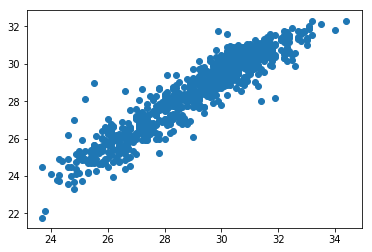

In [0]:
plt.scatter(Y_testTempMax, mlp.predict(X_testTempMax))

In [0]:
tempMaxDefinitiva = dataSetProv["TempMaxima"]
dataSetProv = dataSetProv.drop(columns = "TempMaxima")

In [0]:
dataSetDefinitivo = mms.transform(dataSetProv)

NotFittedError: ignored

In [0]:
prov = pd.DataFrame(index = pd.date_range(start='1/1/1981', end='31/12/2010'))

In [0]:
prov["TempMaxInmet"] = tempMaxDefinitiva

In [0]:
prov.head()

,TempMaxInmet
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,NaN
1981-01-05,NaN


In [0]:
prov = prov.reset_index()

In [0]:
prov["Substituido"] = "N"

In [0]:
prov[prov["Substituido"] == "S"]

,index,TempMaxInmet,Substituido
